In [36]:
from numpy import *
from matplotlib.pyplot import *
import matplotlib.pylab as pylab
import matplotlib.lines as mlines
%matplotlib inline
pylab.rcParams['figure.figsize']= 16,5
import pandas as pd
import gc

In [37]:
def get_TS():
    rawData = pd.read_csv('Resources/Consulta_Banxico.csv', sep=',', encoding='latin1', skiprows=15, skip_blank_lines=True)
    Data = rawData.drop(rawData.index[:2])
    Data = Data.reset_index(drop = True)
    Data.columns = ['Fecha' , 'Tasa de crecimiento Mensual']
    TS = pd.Series(Data['Tasa de crecimiento Mensual'].astype(float))
    TS.index= Data['Fecha']
    del Data
    return TS

In [227]:
def plot_ValSolutions(PredictsList,Mean,TS,MeanRMSE,RMse,upperBound,lowerBound,time):
    """
    Function to Plot List of predictions, mean predictions and Original Time Serie
    :param PredictsList: List of predictions make
    :param Mean: Mean prediction
    :param TS: Original Time Serie
    :return: matplotlib fig
    """
    fig = figure()
    TSValPredictions = TS[len(TS)-13:len(TS)-6].copy()
    for x in PredictsList:
        TSPredictions = pd.Series(x.astype(float), index = TS.index[len(TS)-12:len(TS)-6])
        TSValPredictions[1:] = TSPredictions.copy()
        TSValPredictions.plot(style = 'yo-')
    TSValOutputs = TS[len(TS)-13:len(TS)-6].copy()
    TSValOutputs.plot(style= 'ko-')
    TSMean = pd.Series(Mean.astype(float), index = TS.index[len(TS)-12:len(TS)-6])
    TSMeanPred = TS[len(TS)-13:len(TS)-6].copy()
    TSMeanPred[1:] = TSMean
    TSMeanPred.plot(style= 'bo-')
    
    
    TSUp = pd.Series(upperBound.astype(float), index = TS.index[len(TS)-12:len(TS)-6])
    TSlow = pd.Series(lowerBound.astype(float), index = TS.index[len(TS)-12:len(TS)-6])
    TSLower = TSMeanPred.copy()
    TSUpper = TSMeanPred.copy()
    TSUpper[1:] = TSUp
    TSLower[1:] = TSlow
    TSUpper.plot(style = 'ro-')
    TSLower.plot(style = 'ro-')
    
    ax = fig.add_subplot(111)
    ax.set_ylabel('Tasa de crecimiento')
    MSEtext = 'mean RMSE= ' + (str)(MeanRMSE) + '   RMSE = ' + (str)(RMse)
    in_N = '['
    
   # ax.set_title('in_N=[12,13], hi_N= [9,11,13], learn_R=[0.15,0.2,0.25], iter=[20,50]\n'+ MSEtext)
    
    
    linePred = mlines.Line2D([],[],color='yellow', marker='o',label = 'Predictions')
    lineMean = mlines.Line2D([],[],color='blue', marker='o',label = 'Mean Prediction')
    lineVal = mlines.Line2D([],[],color='black', marker='o',label = 'True Values')
    lineBounds = mlines.Line2D([],[],color='red', marker='o',label = 'Trust Bounds')
    title('mean RMSE= ' + (str)(MeanRMSE) + '        RMSE = ' + (str)(RMse) + '         mean Time = ' + (str)(time) +'s')
    legend(handles = [linePred,lineMean,lineVal,lineBounds],loc= 1)
    fig.savefig("Results/iteraciones/preds.png")
    del fig
    gc.collect()

In [237]:
def plot_TestSolutions(PredictsList,Mean,TS,MeanRMSE,RMse):
    """
    Function to Plot List of predictions, mean predictions and Original Time Serie
    :param PredictsList: List of predictions make
    :param Mean: Mean prediction
    :param TS: Original Time Serie
    :return: matplotlib fig
    """
    fig = figure()
    TSValPredictions = TS[len(TS)-7:len(TS)].copy()
    for x in PredictsList:
        TSPredictions = pd.Series(x.astype(float), index = TS.index[len(TS)-6:len(TS)])
        TSValPredictions[1:] = TSPredictions.copy()
        TSValPredictions.plot(style = 'yo-')
    TSValOutputs = TS[len(TS)-7:len(TS)].copy()
    TSValOutputs.plot(style= 'ko-')
    TSMean = pd.Series(Mean.astype(float), index = TS.index[len(TS)-6:len(TS)])
    TSMeanPred = TS[len(TS)-7:len(TS)].copy()
    TSMeanPred[1:] = TSMean
    TSMeanPred.plot(style= 'bo-')
    
    
    TSUp = pd.Series(upperBound.astype(float), index = TS.index[len(TS)-6:len(TS)])
    TSlow = pd.Series(lowerBound.astype(float), index = TS.index[len(TS)-6:len(TS)])
    TSLower = TSMeanPred.copy()
    TSUpper = TSMeanPred.copy()
    TSUpper[1:] = TSUp
    TSLower[1:] = TSlow
    TSUpper.plot(style = 'ro-')
    TSLower.plot(style = 'ro-')
    
    ax = fig.add_subplot(111)
    ax.set_ylabel('Tasa de crecimiento')
    MSEtext = 'mean RMSE= ' + (str)(MeanRMSE) + '   RMSE = ' + (str)(RMse)
    in_N = '['
    
   # ax.set_title('in_N=[12,13], hi_N= [9,11,13], learn_R=[0.15,0.2,0.25], iter=[20,50]\n'+ MSEtext)
    
    
    linePred = mlines.Line2D([],[],color='yellow', marker='o',label = 'Predictions')
    lineMean = mlines.Line2D([],[],color='blue', marker='o',label = 'Mean Prediction')
    lineVal = mlines.Line2D([],[],color='black', marker='o',label = 'True Values')
    lineBounds = mlines.Line2D([],[],color='red', marker='o',label = 'Trust Bounds')
    title('mean RMSE= ' + (str)(MeanRMSE) + '        RMSE = ' + (str)(RMse) + '         mean Time = ' + (str)(time) +'s')
    legend(handles = [linePred,lineMean,lineVal,lineBounds],loc= 1)
    fig.savefig("Results/iteraciones/preds.png")
    del fig
    gc.collect()

In [198]:
predictions = pd.read_csv("Results/iteraciones/Validation_predicions.csv" )
TS = get_TS()

In [199]:
predictions['RMSE'] = predictions['MSE'].apply(lambda x :  np.sqrt(x))

In [200]:
MeanRMSE = predictions['RMSE'].mean()

In [201]:
MeanRMSE

3.0868476896993764

In [202]:
preds = ['Pred1','Pred2','Pred3','Pred4','Pred5','Pred6']

In [203]:
params = ['Param1','Param2','Param3','Param4','Param5']

In [204]:
meanPred = np.mean(predictions[preds])

In [205]:
upperBound = meanPred + MeanRMSE

In [206]:
lowerBound = meanPred - MeanRMSE

In [207]:
RMSE = np.sqrt(np.mean((TS[-12:-6].values-meanPred)**2))

In [215]:
print meanPred.values
print TS[-12:-6].values

[ 0.60247781  4.66799307  1.24893686  1.00174982  0.79403223  0.43792287]
[-5.09  7.91 -1.05  1.96  0.27  0.78]


In [209]:
meanTime = predictions['Time'].mean()

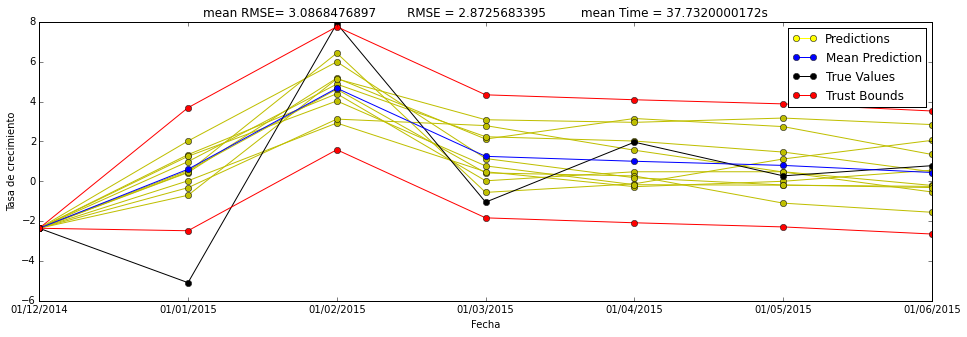

In [228]:
plot_ValSolutions(predictions[preds].as_matrix(),meanPred.as_matrix(),TS,MeanRMSE,RMSE,upperBound.as_matrix(),lowerBound.as_matrix(), meanTime)

In [217]:
predictions.groupby(['Param1'])['RMSE'].max()

Param1
100    3.276756
Name: RMSE, dtype: float64

In [218]:
predictions.groupby(['Param1'])['RMSE'].min()

Param1
100    2.582372
Name: RMSE, dtype: float64

In [219]:
predictions['Time'].mean()

37.732000017166136

In [220]:
predictions[predictions['RMSE']<0.99].count()

Param1    0
Param2    0
Param3    0
Param4    0
Param5    0
Pred1     0
Pred2     0
Pred3     0
Pred4     0
Pred5     0
Pred6     0
MSE       0
Time      0
RMSE      0
dtype: int64

In [244]:
test_predictions = pd.read_csv("Results/iteraciones/Test_predicions.csv" )

In [245]:
testmean= test_predictions[preds].mean()

In [246]:
test_predictions[preds].min()

Pred1    2.598123
Pred2    0.980989
Pred3   -1.735374
Pred4   -3.370571
Pred5    1.715624
Pred6   -0.985993
dtype: float64

In [247]:
test_predictions['RMSE'] = test_predictions['MSE'].apply(lambda x :  np.sqrt(x))

In [248]:
meantestRMSE = test_predictions['RMSE'].mean()

In [249]:
testRMSE = RMSE = np.sqrt(np.mean((TS[-6:].values-testmean)**2))

NameError: global name 'time' is not defined

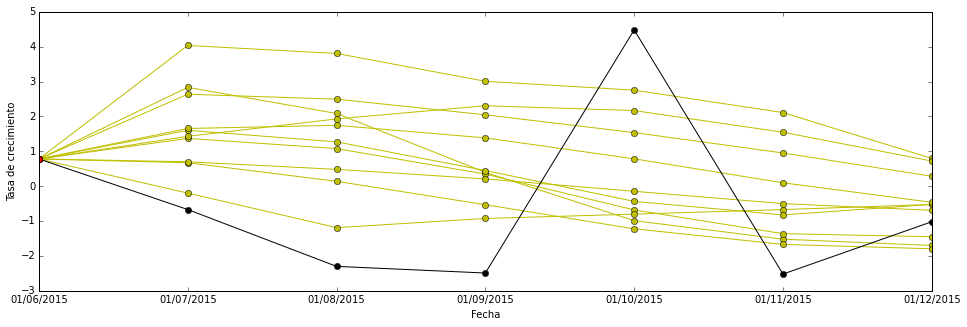

In [243]:
plot_TestSolutions(test_predictions[preds].as_matrix(),testmean,TS,meantestRMSE,testRMSE)